In [11]:
import qiskit
from qiskit import assemble, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from random import *
from qiskit import Aer
sim = Aer.get_backend("statevector_simulator")
import numpy as np
from qiskit.circuit.library.standard_gates import HGate
from qiskit.circuit.library import RZGate, RYGate

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import time
from IPython.display import clear_output

In [12]:
df = pd.read_csv('Magnetization data 4x4.csv')
df

,Unnamed: 0,kT=0.01,kT=2.8664285714285715,kT=5.722857142857143,kT=8.579285714285716,kT=11.435714285714287,kT=14.292142857142858,kT=17.148571428571433,kT=20.005000000000003,kT=22.861428571428576,kT=25.71785714285715,kT=28.57428571428572,kT=31.43071428571429,kT=34.28714285714286,kT=37.143571428571434,kT=40.0
0,0,1.0,1.000,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.875,0.875,1.000,0.875,0.875
1,1,1.0,1.000,0.750,0.750,0.750,0.875,0.750,0.750,0.750,0.875,1.000,0.750,1.000,0.750,0.875
2,2,1.0,1.000,0.750,0.750,0.625,0.875,0.625,0.750,0.875,0.750,0.875,0.625,1.000,0.625,0.750
3,3,1.0,1.000,0.750,0.750,0.500,0.875,0.500,0.625,0.750,0.875,0.750,0.750,0.875,0.500,0.625
4,4,1.0,1.000,0.750,0.625,0.375,0.750,0.375,0.625,0.625,0.750,0.750,0.625,0.750,0.625,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,499995,1.0,0.750,-0.250,0.375,-0.125,-0.125,0.000,0.625,-0.125,0.250,0.125,0.000,0.500,0.000,0.125
499996,499996,1.0,0.625,-0.375,0.250,-0.250,0.000,0.125,0.500,0.000,0.125,0.000,-0.125,0.625,-0.125,0.250
499997,499997,1.0,0.500,-0.250,0.125,-0.250,0.125,0.000,0.375,0.125,0.250,-0.125,-0.250,0.625,-0.125,0.125
499998,499998,1.0,0.625,-0.375,0.000,-0.125,0.125,0.000,0.500,0.250,0.375,-0.250,-0.375,0.750,0.000,0.250


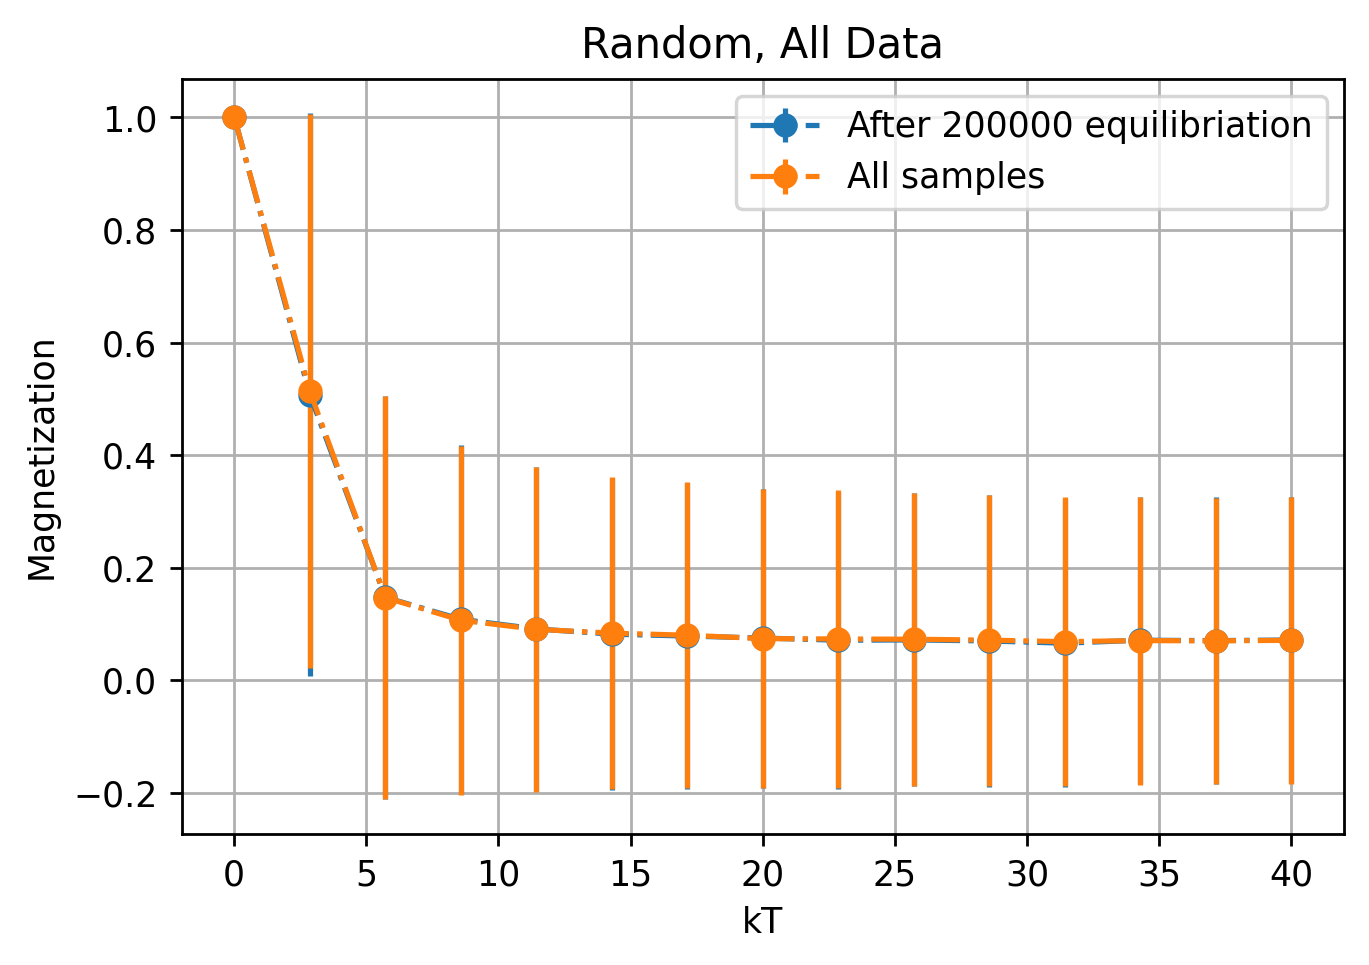

In [7]:
eqlb = 200000
keys = df.keys()[1:]
temps = np.linspace(0.01, 40, 15)
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb:]))
    std.append(np.std(df[key][eqlb:]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.title('Random, All Data')
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.grid()

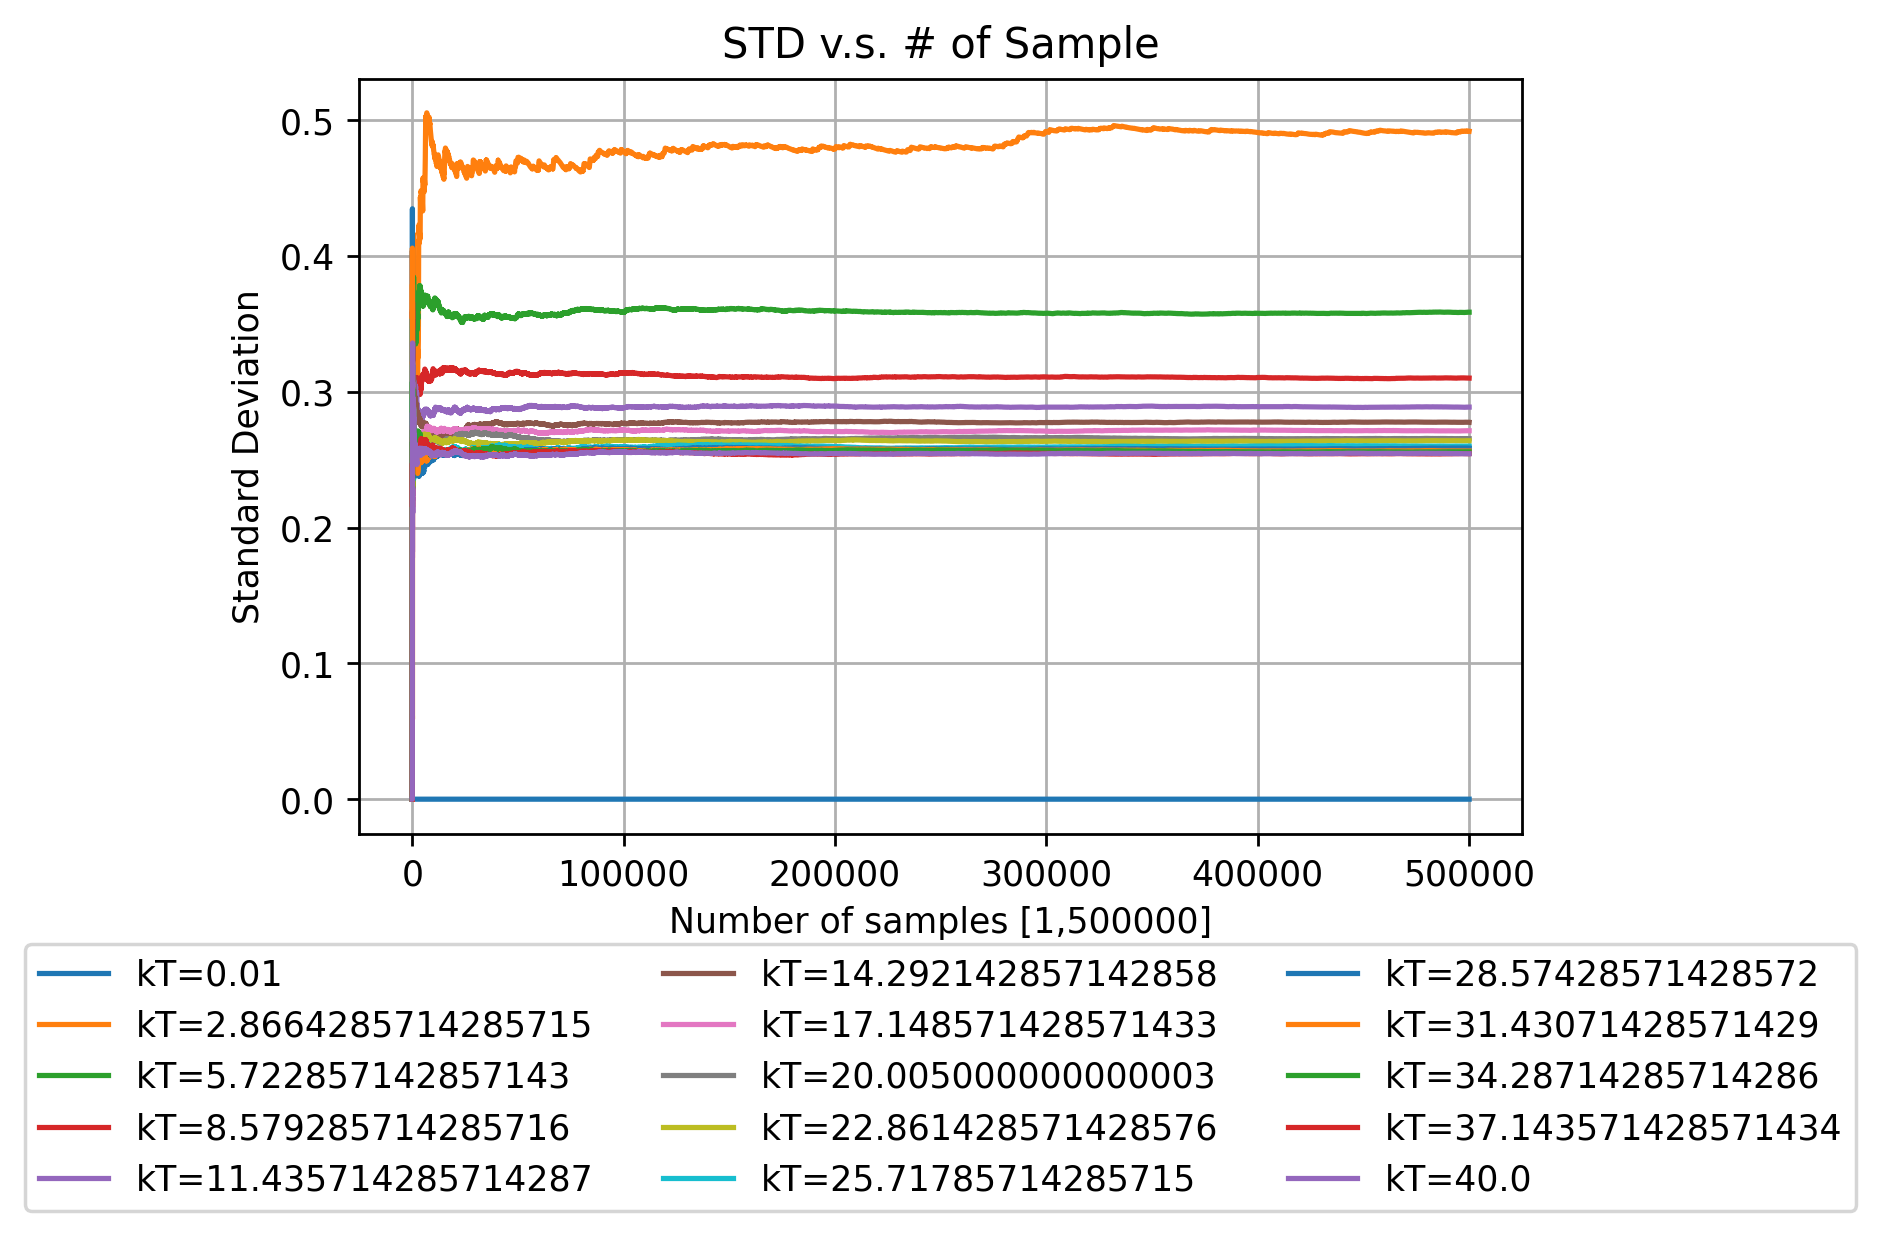

In [9]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = df[key]
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.title('STD v.s. # of Sample')
plt.xlabel('Number of samples [1,500000]')
plt.ylabel('Standard Deviation')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()

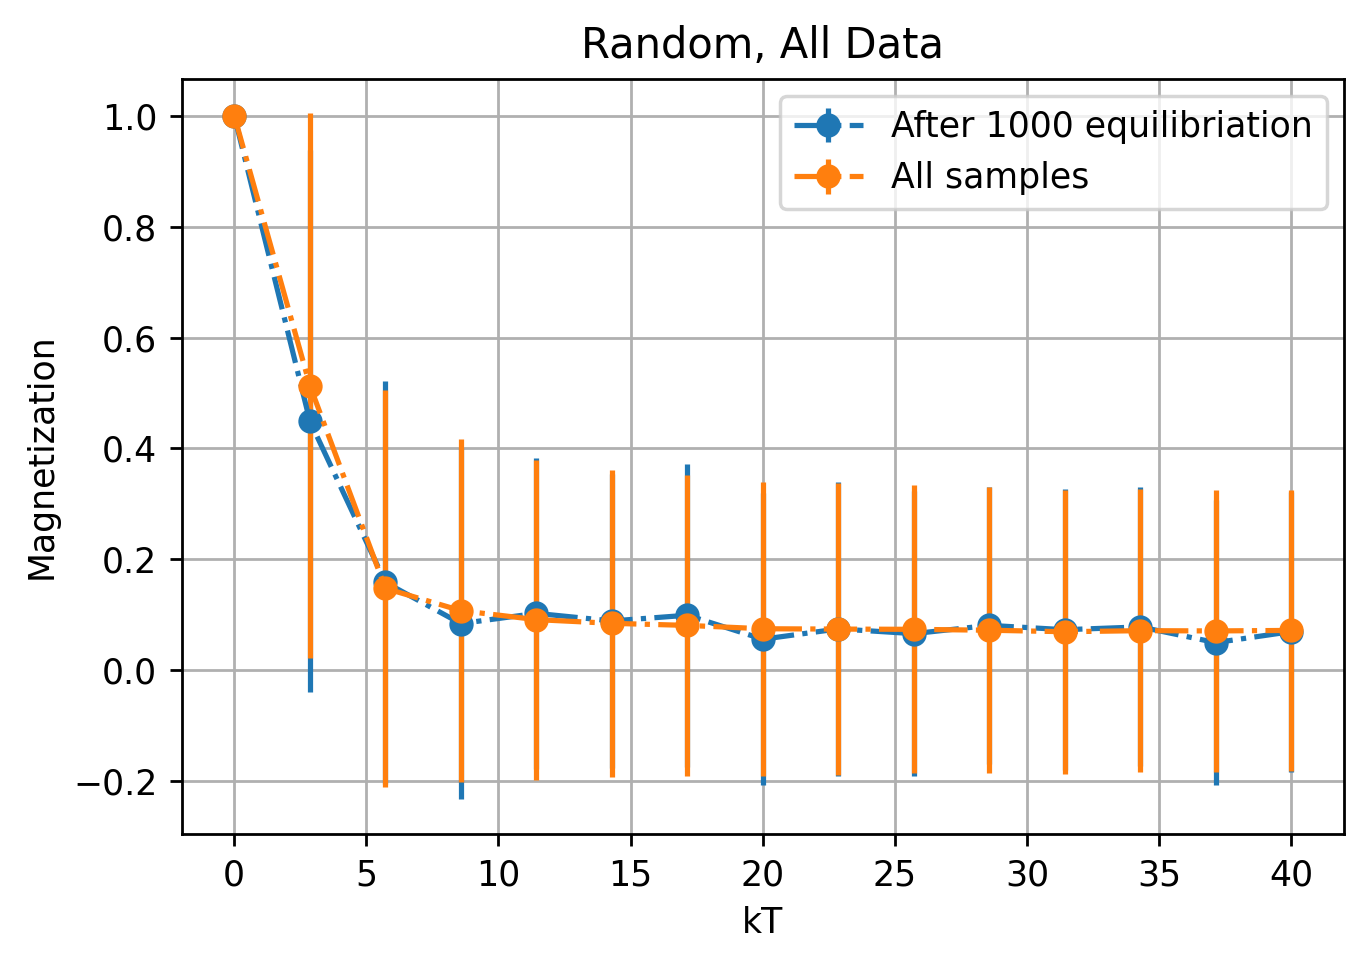

In [13]:
eqlb = 1000
keys = df.keys()[1:]
temps = np.linspace(0.01, 40, 15)
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb:10000]))
    std.append(np.std(df[key][eqlb:10000]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.title('Random, All Data')
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.grid()

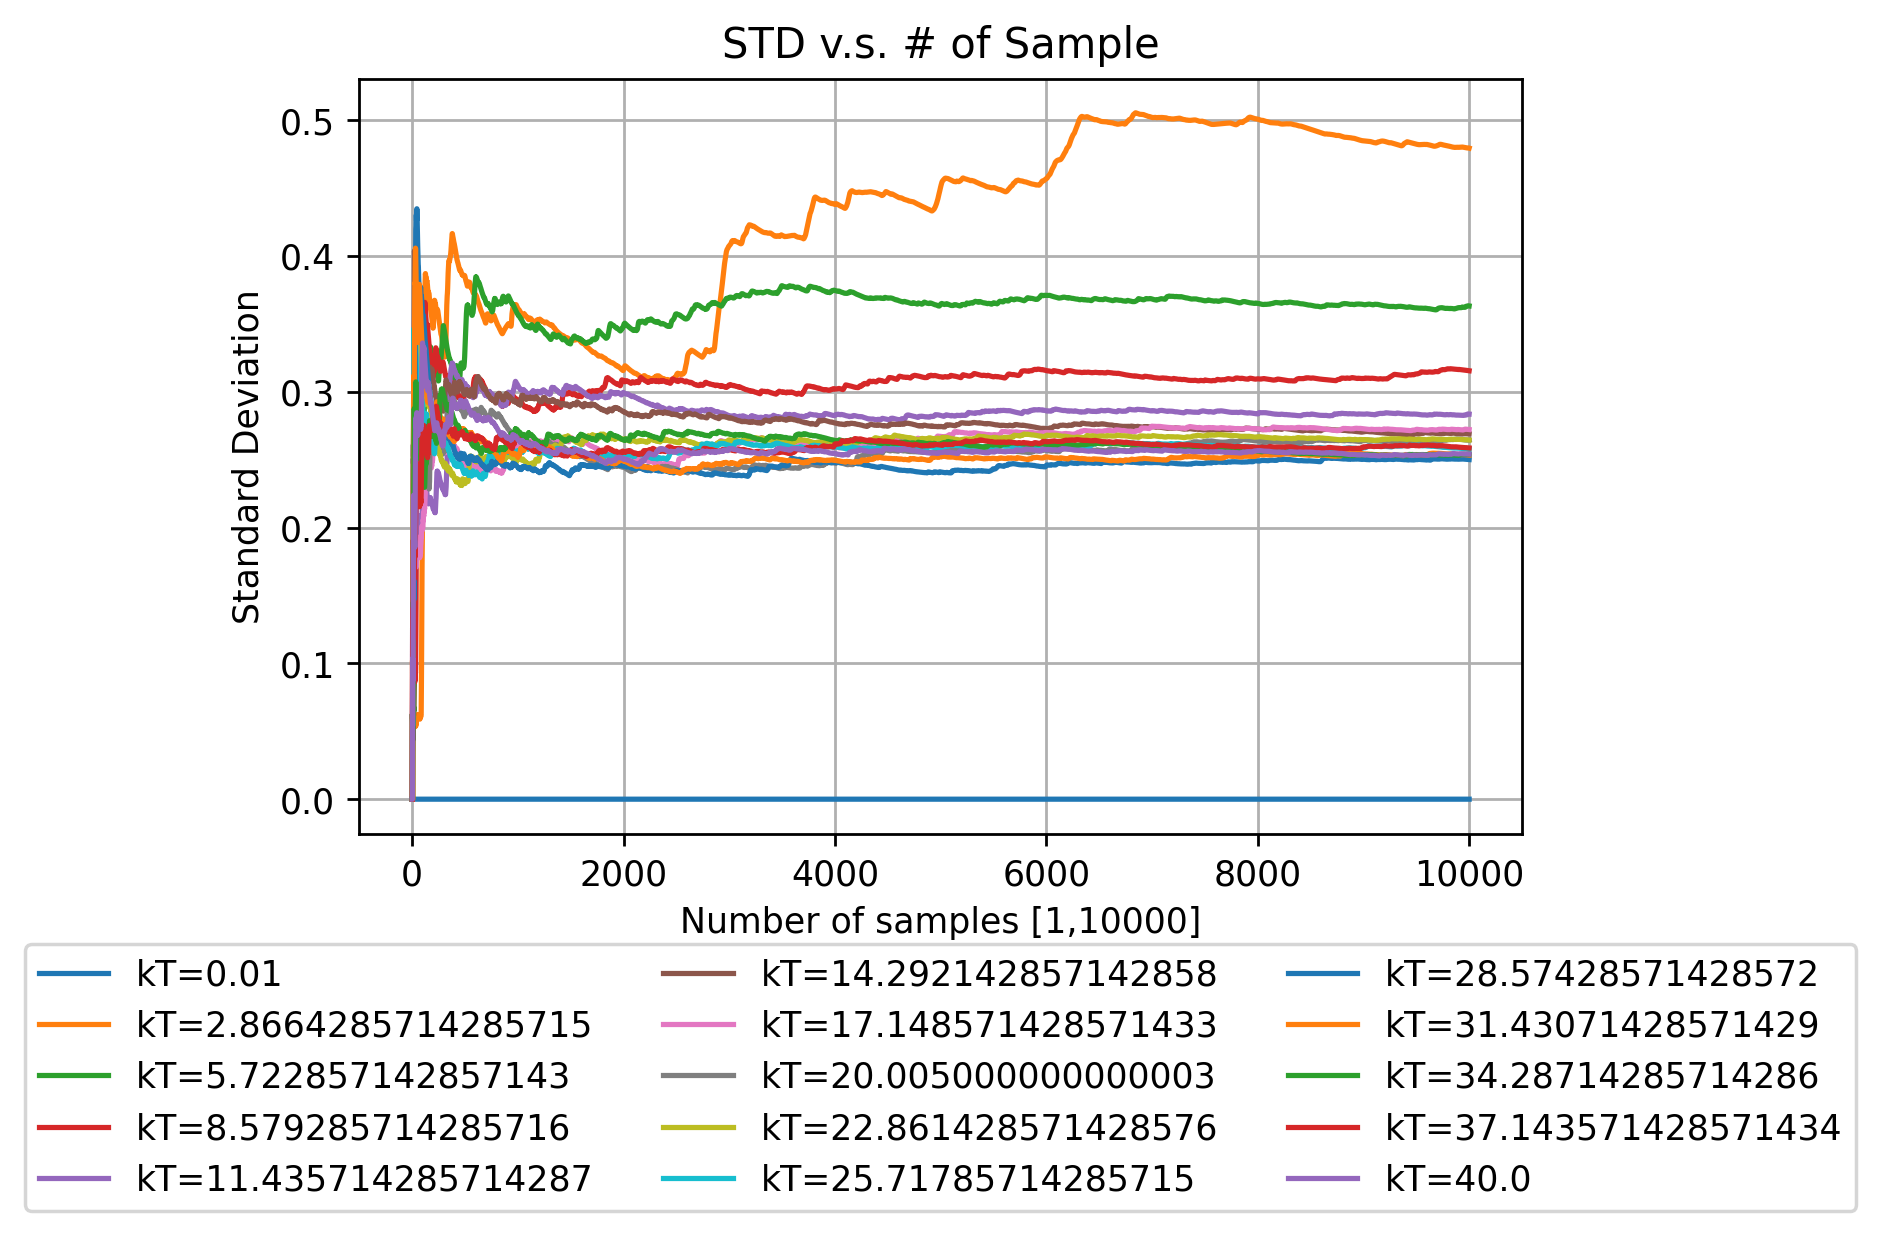

In [15]:
plt.figure(dpi = 250)
eqlb = 10000

for key in keys:
    temp_data = df[key]
    std = [np.std(temp_data[:i]) for i in range(10000)]
    plt.plot(std, label = key)
    
plt.legend()
plt.title('STD v.s. # of Sample')
plt.xlabel('Number of samples [1,10000]')
plt.ylabel('Standard Deviation')
plt.legend(bbox_to_anchor=(0.5, -0.5), loc='lower center', ncol = 3, borderaxespad=0)
plt.grid()
plt.show()